Step 1 — Imports

In [1]:
import os
from pathlib import Path
import re
import textwrap
import json

import numpy as np
import pandas as pd

import seaborn as sns

# display nicer plots in notebook
%matplotlib inline
sns.set(style="whitegrid")

print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("seaborn:", sns.__version__)


pandas: 2.2.3
numpy: 2.1.1
seaborn: 0.13.2


In [2]:
# %% cell: find_files
DATA_DIR = Path("C:/Users/ROYAUME MEDIAS/OneDrive/Desktop/DataGeneration/data")
print("Checking data directory:", DATA_DIR.resolve())

expected_files = [
    "people.csv",
    "person_skills.csv",
    "skills.csv",
    "experience.csv",
    "education.csv",
    "abilities.csv",]

found = {f: (DATA_DIR / f).exists() for f in expected_files}
print("Data directory:", DATA_DIR.resolve())
print("Found files:")
for f, exists in found.items():
    print(f" - {f}: {'FOUND' if exists else 'missing'}")

# Quick listing of any CSVs in the folder
print("\nOther CSVs in directory:")
for p in sorted(DATA_DIR.glob("*.csv")):
    print(" -", p.name)


Checking data directory: C:\Users\ROYAUME MEDIAS\OneDrive\Desktop\DataGeneration\data
Data directory: C:\Users\ROYAUME MEDIAS\OneDrive\Desktop\DataGeneration\data
Found files:
 - people.csv: FOUND
 - person_skills.csv: FOUND
 - skills.csv: FOUND
 - experience.csv: FOUND
 - education.csv: FOUND
 - abilities.csv: FOUND

Other CSVs in directory:
 - abilities.csv
 - education.csv
 - experience.csv
 - people.csv
 - person_skills.csv
 - skills.csv


In [3]:
# %% cell: load_data_updated
import pandas as pd

# Map of dataset names to CSV files found
csv_mapping = {
    "people": "people.csv",
    "person_skills": "person_skills.csv",
    "skills": "skills.csv",
    "experience": "experience.csv",
    "education": "education.csv",
    "abilities": "abilities.csv"}

# Load DataFrames
datasets = {}
for name, filename in csv_mapping.items():
    if filename and (DATA_DIR / filename).exists():
        df = pd.read_csv(DATA_DIR / filename, dtype=str, keep_default_na=False, na_values=["", "NA", "NaN"])
        datasets[name] = df
        print(f"{name}: {df.shape[0]} rows, {df.shape[1]} columns")
        display(df.head(3))
    else:
        datasets[name] = pd.DataFrame()
        print(f"{name}: MISSING or empty")

# Assign each DataFrame to variable for convenience
people = datasets["people"]
person_skills = datasets["person_skills"]
skills = datasets["skills"]
experience = datasets["experience"]
education = datasets["education"]
abilities = datasets["abilities"]

print("Loaded datasets summary:")
for name, df in datasets.items():
    print(f" - {name}: {len(df)} rows, columns = {list(df.columns)}")


people: 54933 rows, 5 columns


,person_id,name,email,phone,linkedin
0,1,Database Administrator,NaN,NaN,NaN
1,2,Database Administrator,NaN,NaN,NaN
2,3,Oracle Database Administrator,NaN,NaN,NaN


person_skills: 2483376 rows, 2 columns


,person_id,skill
0,1,Database administration
1,1,Database
2,1,Ms sql server


skills: 226760 rows, 1 columns


,skill
0,Mongo DB-3.2
1,JNDI LDAP
2,Stored Procedures


experience: 265404 rows, 6 columns


,person_id,title,firm,start_date,end_date,location
0,1,Database Administrator,Family Private Care LLC,04/2017,Present,"Roswell, GA"
1,1,Database Administrator,Incomm,01/2014,02/2017,"Alpharetta, GA"
2,2,Database Administrator,Intercontinental Registry,12/2008,08/2011,"Lagos, GU"


education: 75999 rows, 5 columns


,person_id,institution,program,start_date,location
0,1,Lead City University,Bachelor of Science,07/2013,NaN
1,2,lagos state university,bsc in computer science,NaN,"Lagos, GU"
2,3,"JNTU - Kakinada, Andhra Pradesh",Master of Computer Applications in Science and...,2013,"Kakinada, Andhra Pradesh"


abilities: 1219473 rows, 2 columns


,person_id,ability
0,1,Installation and Building Server
1,1,Running Backups
2,1,Recovering and Restoring Models


Loaded datasets summary:
 - people: 54933 rows, columns = ['person_id', 'name', 'email', 'phone', 'linkedin']
 - person_skills: 2483376 rows, columns = ['person_id', 'skill']
 - skills: 226760 rows, columns = ['skill']
 - experience: 265404 rows, columns = ['person_id', 'title', 'firm', 'start_date', 'end_date', 'location']
 - education: 75999 rows, columns = ['person_id', 'institution', 'program', 'start_date', 'location']
 - abilities: 1219473 rows, columns = ['person_id', 'ability']


In [4]:
# %% cell: data_quality_check
import pandas as pd

# Function to summarize a dataframe
def summarize_df(df, name):
    print(f"--- {name} ---")
    print(f"Shape: {df.shape}")
    print("Data types:")
    print(df.dtypes)
    print("\nMissing values per column:")
    print(df.isna().sum())
    print("\nNumber of duplicated rows:", df.duplicated().sum())
    print("-" * 50, "\n")

# List of datasets
datasets = {
    "people": people,
    "person_skills": person_skills,
    "skills": skills,
    "experience": experience,
    "education": education,
    "abilities": abilities
}

# Loop through datasets and summarize
for name, df in datasets.items():
    summarize_df(df, name)




--- people ---
Shape: (54933, 5)
Data types:
person_id    object
name         object
email        object
phone        object
linkedin     object
dtype: object

Missing values per column:
person_id        0
name           108
email        53301
phone        53055
linkedin     46356
dtype: int64

Number of duplicated rows: 0
-------------------------------------------------- 

--- person_skills ---
Shape: (2483376, 2)
Data types:
person_id    object
skill        object
dtype: object

Missing values per column:
person_id    0
skill        3
dtype: int64

Number of duplicated rows: 587511
-------------------------------------------------- 

--- skills ---
Shape: (226760, 1)
Data types:
skill    object
dtype: object

Missing values per column:
skill    1
dtype: int64

Number of duplicated rows: 0
-------------------------------------------------- 

--- experience ---
Shape: (265404, 6)
Data types:
person_id     object
title         object
firm          object
start_date    object
end_date  

C:\Users\ROYAUME MEDIAS\AppData\Local\Temp\ipykernel_23708\2172102829.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\ROYAUME MEDIAS\AppData\Local\Temp\ipykernel_23708\2172102829.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\ROYAUME MEDIAS\AppData\Local\Temp\ipykernel_23708\2172102829.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\ROYAUME MEDIAS\AppData\Local\Temp\ipykernel_23708\2172102829.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() o

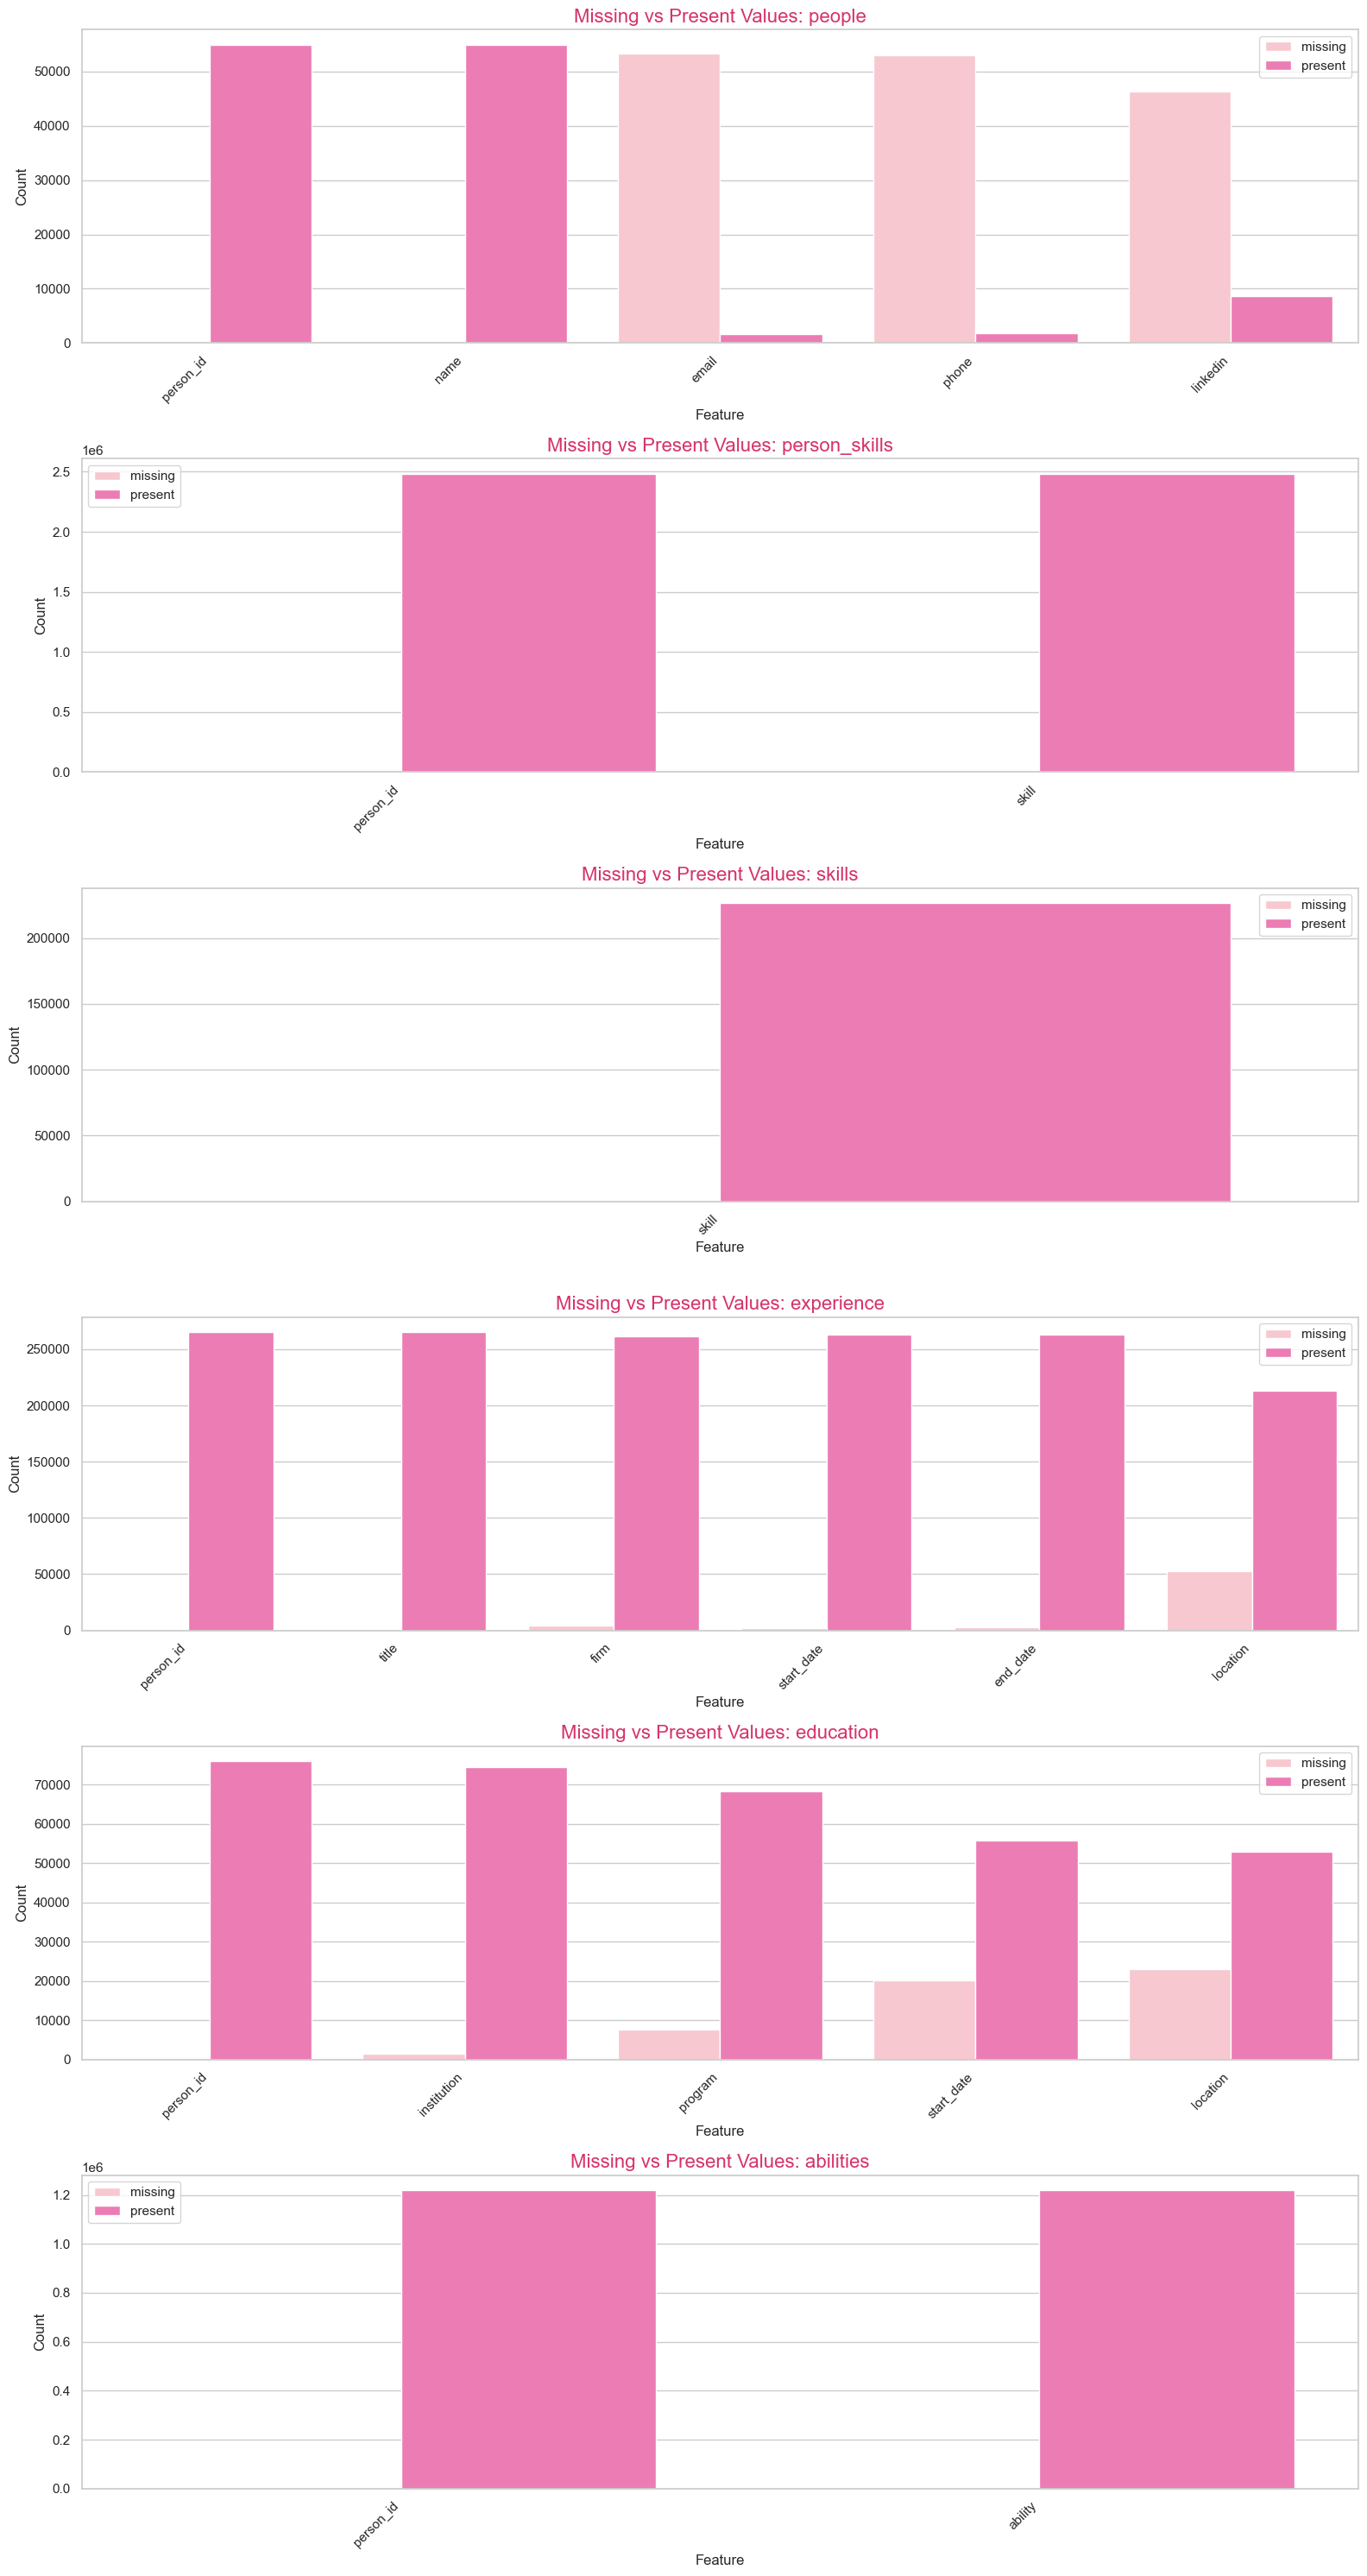

In [5]:
# %% cell: missing_values_dashboard
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (18, 12)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12

# Prepare colors
color_present = "#ffc0cb"  # soft pink
color_missing = "#ff69b4"  # bright pink

# Number of datasets
n_datasets = len(datasets)
fig, axes = plt.subplots(n_datasets, 1, figsize=(16, 5*n_datasets))

if n_datasets == 1:
    axes = [axes]

for ax, (name, df) in zip(axes, datasets.items()):
    missing_counts = df.isnull().sum()
    present_counts = df.shape[0] - missing_counts
    
    plot_df = pd.DataFrame({
        'feature': missing_counts.index,
        'missing': missing_counts.values,
        'present': present_counts.values
    }).melt(id_vars='feature', value_vars=['missing','present'], var_name='Status', value_name='Count')
    
    sns.barplot(data=plot_df, x='feature', y='Count', hue='Status',
                palette=[color_present, color_missing], ax=ax)
    
    ax.set_title(f"Missing vs Present Values: {name}", color="#d6336c")
    ax.set_ylabel("Count")
    ax.set_xlabel("Feature")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.legend(title='')

plt.tight_layout()
plt.show()


C:\Users\ROYAUME MEDIAS\AppData\Local\Temp\ipykernel_23708\301756846.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skill_percent.values, y=skill_percent.index, palette=pink_palette, ax=axes[0,0])
C:\Users\ROYAUME MEDIAS\AppData\Local\Temp\ipykernel_23708\301756846.py:20: UserWarning: 
The palette list has fewer values (10) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=skill_percent.values, y=skill_percent.index, palette=pink_palette, ax=axes[0,0])
C:\Users\ROYAUME MEDIAS\AppData\Local\Temp\ipykernel_23708\301756846.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ability_percent.values, y=ability_percent.index, palette=pink_palet

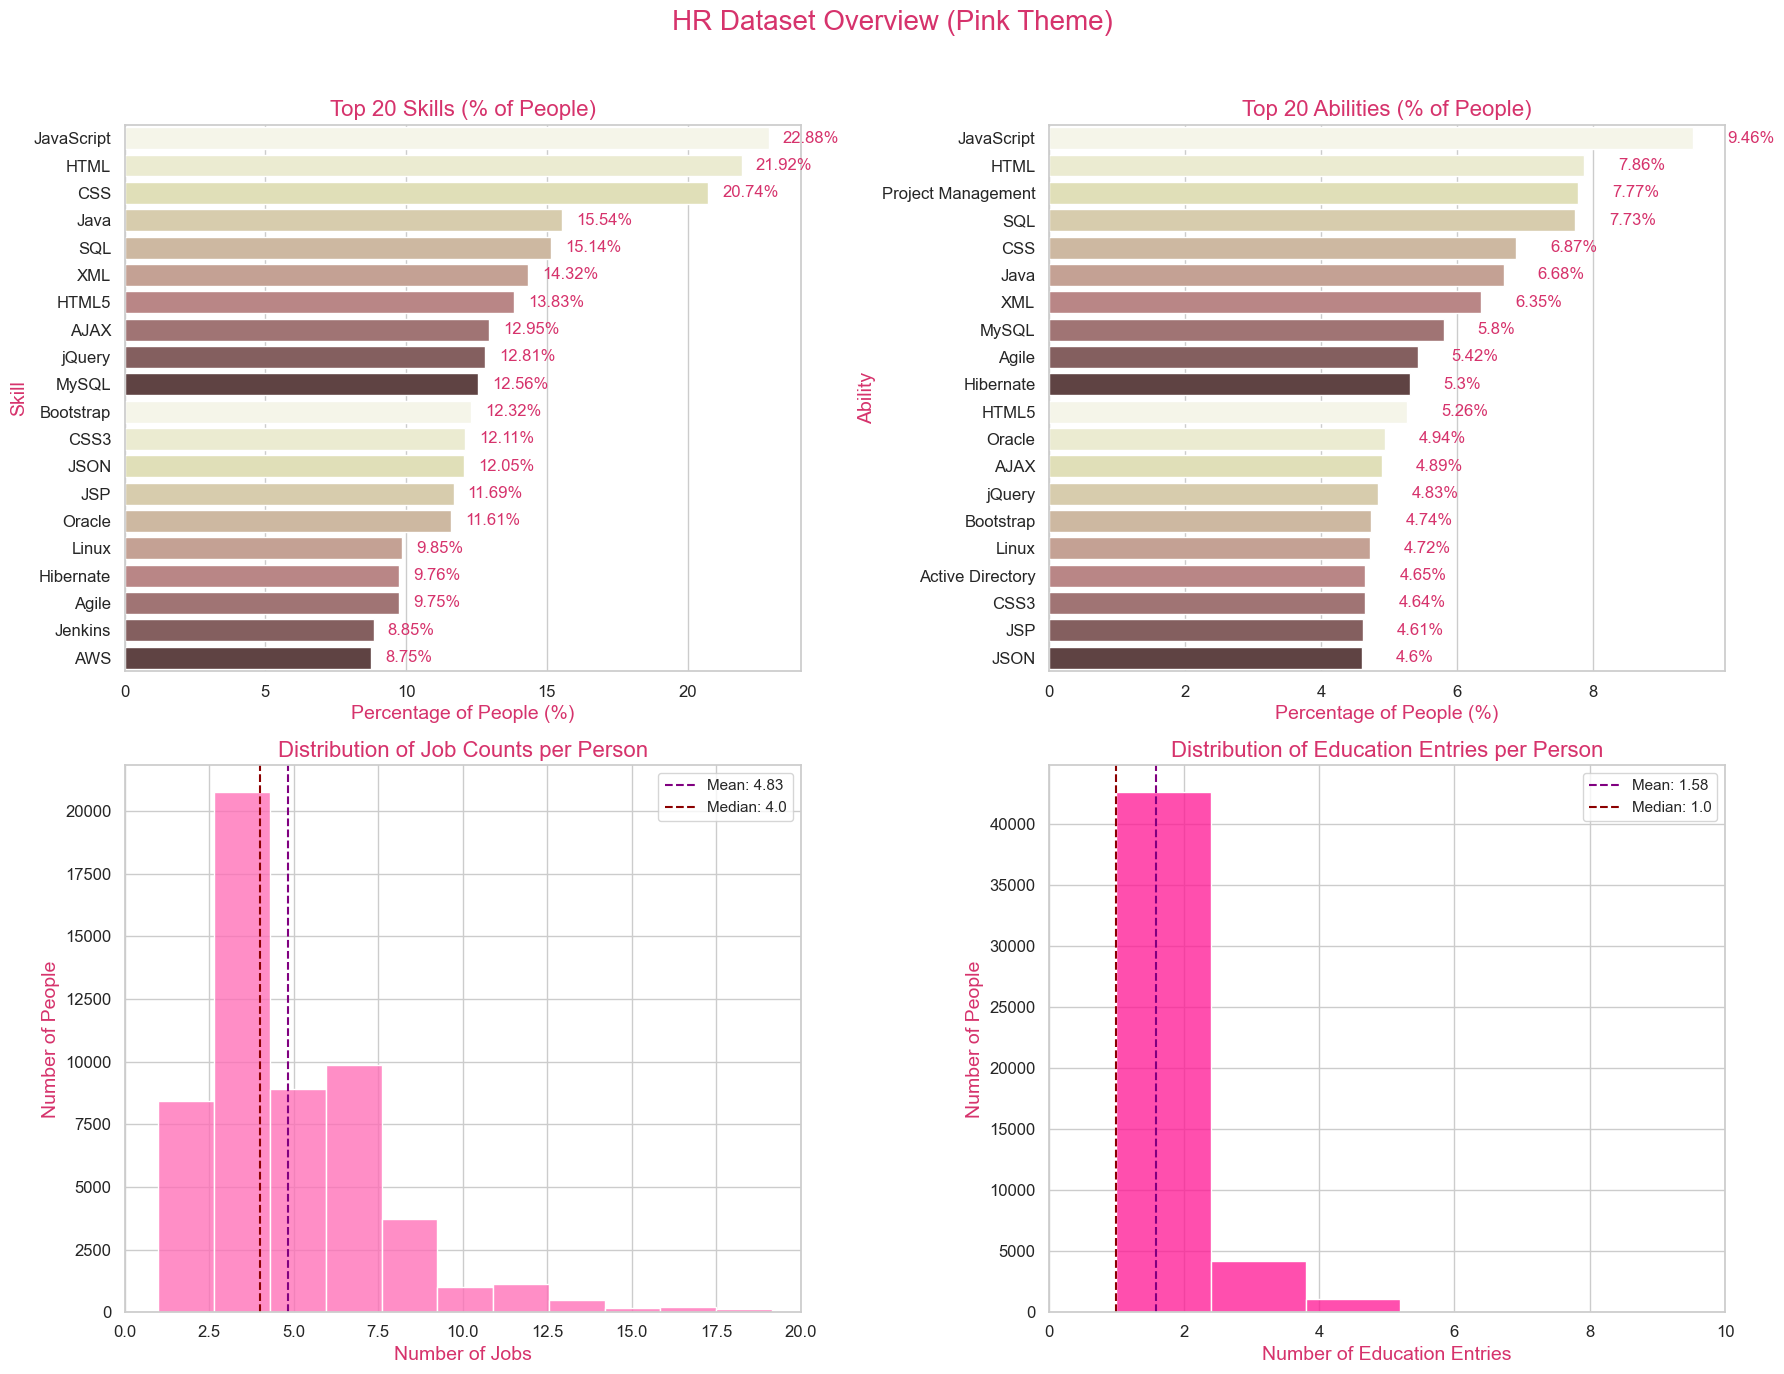

In [6]:
# %% cell: eda_seaborn_pink_dashboard
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
pink_palette = sns.color_palette("pink_r", 10)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

total_people = len(people)

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle("HR Dataset Overview (Pink Theme)", fontsize=20, color="#d6336c")

# ---------- 1️⃣ Top 20 Skills (% of People) ----------
skill_counts = person_skills.groupby('skill')['person_id'].nunique().sort_values(ascending=False).head(20)
skill_percent = (skill_counts / total_people * 100).round(2)
sns.barplot(x=skill_percent.values, y=skill_percent.index, palette=pink_palette, ax=axes[0,0])
axes[0,0].set_title("Top 20 Skills (% of People)", color="#d6336c")
axes[0,0].set_xlabel("Percentage of People (%)", color="#d6336c")
axes[0,0].set_ylabel("Skill", color="#d6336c")
for i, v in enumerate(skill_percent.values):
    axes[0,0].text(v + 0.5, i, f"{v}%", color="#d6336c", va='center')

# ---------- 2️⃣ Top 20 Abilities (% of People) ----------
ability_counts = abilities.groupby('ability')['person_id'].nunique().sort_values(ascending=False).head(20)
ability_percent = (ability_counts / total_people * 100).round(2)
sns.barplot(x=ability_percent.values, y=ability_percent.index, palette=pink_palette, ax=axes[0,1])
axes[0,1].set_title("Top 20 Abilities (% of People)", color="#d6336c")
axes[0,1].set_xlabel("Percentage of People (%)", color="#d6336c")
axes[0,1].set_ylabel("Ability", color="#d6336c")
for i, v in enumerate(ability_percent.values):
    axes[0,1].text(v + 0.5, i, f"{v}%", color="#d6336c", va='center')

# ---------- 3️⃣ Jobs per Person ----------
jobs_per_person = experience.groupby("person_id").size()
sns.histplot(jobs_per_person, bins=20, kde=False, color="#ff69b4", ax=axes[1,0])
axes[1,0].set_title("Distribution of Job Counts per Person", color="#d6336c")
axes[1,0].set_xlabel("Number of Jobs", color="#d6336c")
axes[1,0].set_ylabel("Number of People", color="#d6336c")
mean_jobs = jobs_per_person.mean()
median_jobs = jobs_per_person.median()
axes[1,0].axvline(mean_jobs, color='purple', linestyle='--', label=f"Mean: {mean_jobs:.2f}")
axes[1,0].axvline(median_jobs, color='darkred', linestyle='--', label=f"Median: {median_jobs}")
axes[1,0].set_xlim(0, 20)
axes[1,0].legend()

# ---------- 4️⃣ Education Entries per Person ----------
edu_per_person = education.groupby("person_id").size()
sns.histplot(edu_per_person, bins=10, kde=False, color="#ff1493", ax=axes[1,1])
axes[1,1].set_title("Distribution of Education Entries per Person", color="#d6336c")
axes[1,1].set_xlabel("Number of Education Entries", color="#d6336c")
axes[1,1].set_ylabel("Number of People", color="#d6336c")
mean_edu = edu_per_person.mean()
median_edu = edu_per_person.median()
axes[1,1].axvline(mean_edu, color='purple', linestyle='--', label=f"Mean: {mean_edu:.2f}")
axes[1,1].axvline(median_edu, color='darkred', linestyle='--', label=f"Median: {median_edu}")
axes[1,1].set_xlim(0, 10)
axes[1,1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


C:\Users\ROYAUME MEDIAS\AppData\Local\Temp\ipykernel_23708\4183985724.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_titles.values, y=top_titles.index, palette=pink_palette, ax=axes[1,0])
C:\Users\ROYAUME MEDIAS\AppData\Local\Temp\ipykernel_23708\4183985724.py:36: UserWarning: 
The palette list has fewer values (10) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=top_titles.values, y=top_titles.index, palette=pink_palette, ax=axes[1,0])
C:\Users\ROYAUME MEDIAS\AppData\Local\Temp\ipykernel_23708\4183985724.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_programs.values, y=top_programs.index, palette=pink_palette, ax=axes[1,1

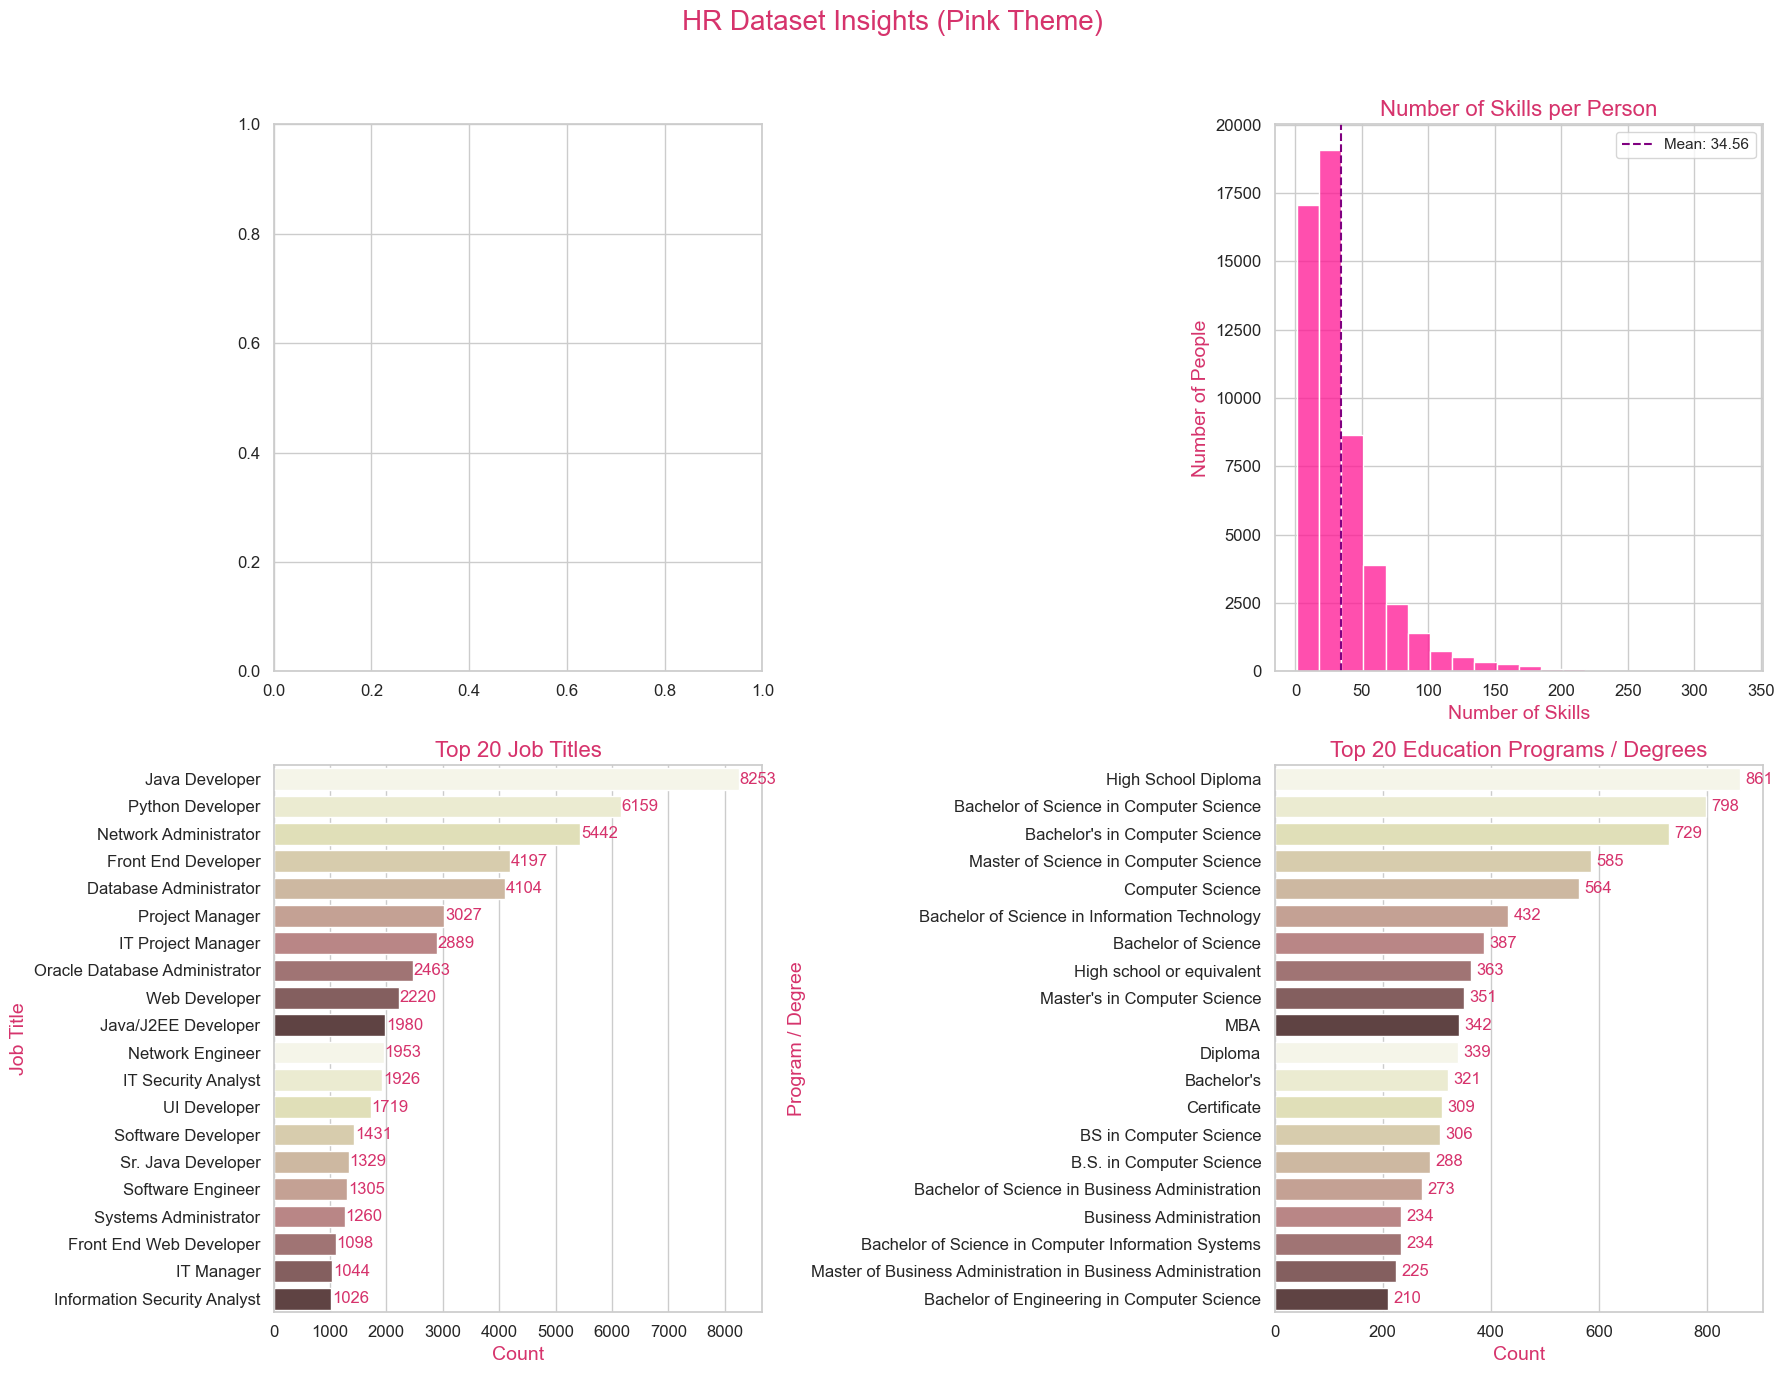

In [7]:
# %% cell: eda_seaborn_pink_additional
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
pink_palette = sns.color_palette("pink_r", 10)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle("HR Dataset Insights (Pink Theme)", fontsize=20, color="#d6336c")

# ---------- 1️⃣ Missing values per column (stacked bar) ----------
datasets_dict = {
    "People": people,
    "Person Skills": person_skills,
    "Experience": experience,
    "Education": education,
    "Abilities": abilities
}

# ---------- 2️⃣ Number of skills per person ----------
skills_per_person = person_skills.groupby("person_id")["skill"].nunique()
sns.histplot(skills_per_person, bins=20, kde=False, color="#ff1493", ax=axes[0,1])
axes[0,1].set_title("Number of Skills per Person", color="#d6336c")
axes[0,1].set_xlabel("Number of Skills", color="#d6336c")
axes[0,1].set_ylabel("Number of People", color="#d6336c")
mean_skills = skills_per_person.mean()
axes[0,1].axvline(mean_skills, color='purple', linestyle='--', label=f"Mean: {mean_skills:.2f}")
axes[0,1].legend()

# ---------- 3️⃣ Top 20 Job Titles ----------
top_titles = experience['title'].value_counts().head(20)
sns.barplot(x=top_titles.values, y=top_titles.index, palette=pink_palette, ax=axes[1,0])
axes[1,0].set_title("Top 20 Job Titles", color="#d6336c")
axes[1,0].set_xlabel("Count", color="#d6336c")
axes[1,0].set_ylabel("Job Title", color="#d6336c")
for i, v in enumerate(top_titles.values):
    axes[1,0].text(v + 10, i, str(v), color="#d6336c", va='center')

# ---------- 4️⃣ Top 20 Education Programs / Degrees ----------
top_programs = education['program'].value_counts().head(20)
sns.barplot(x=top_programs.values, y=top_programs.index, palette=pink_palette, ax=axes[1,1])
axes[1,1].set_title("Top 20 Education Programs / Degrees", color="#d6336c")
axes[1,1].set_xlabel("Count", color="#d6336c")
axes[1,1].set_ylabel("Program / Degree", color="#d6336c")
for i, v in enumerate(top_programs.values):
    axes[1,1].text(v + 10, i, str(v), color="#d6336c", va='center')

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()


In [8]:
# ---------- Aggregate skills ----------
# Group all skills for each person into a list
skills_per_person = (
    person_skills.groupby("person_id", group_keys=False)['skill']  # group_keys=False avoids including 'person_id' in apply
    .apply(list)
    .reset_index()
)

# ---------- Aggregate abilities ----------
# Group all abilities for each person into a list
abilities_per_person = (
    abilities.groupby("person_id", group_keys=False)['ability']
    .apply(list)
    .reset_index()
)

# ---------- Aggregate experiences ----------
# Convert all experience rows per person into a list of dictionaries
experience_per_person = (
    experience.groupby("person_id", group_keys=False)
    .apply(lambda x: x[['title','firm','start_date','end_date','location']].to_dict(orient='records'))
    .reset_index()
    .rename(columns={0:'experience'})
)

# ---------- Aggregate education ----------
# Convert all education rows per person into a list of dictionaries
education_per_person = (
    education.groupby("person_id", group_keys=False)
    .apply(lambda x: x[['institution','program','start_date','location']].to_dict(orient='records'))
    .reset_index()
    .rename(columns={0:'education'})
)


C:\Users\ROYAUME MEDIAS\AppData\Local\Temp\ipykernel_23708\3416718266.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x[['title','firm','start_date','end_date','location']].to_dict(orient='records'))
C:\Users\ROYAUME MEDIAS\AppData\Local\Temp\ipykernel_23708\3416718266.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x[['institution','program','start_date','locatio

In [9]:
from pathlib import Path
import pandas as pd

# ---------- Set the data folder ----------
DATA_DIR = Path("C:/Users/ROYAUME MEDIAS/OneDrive/Desktop/DataGeneration/data")
DATA_DIR.mkdir(parents=True, exist_ok=True)

# ---------- Merge all aggregated datasets into people ----------
full_df = people.copy()

# Merge skills
full_df = full_df.merge(skills_per_person, on="person_id", how="left")

# Merge abilities
full_df = full_df.merge(abilities_per_person, on="person_id", how="left")

# Merge experiences
full_df = full_df.merge(experience_per_person, on="person_id", how="left")

# Merge education
full_df = full_df.merge(education_per_person, on="person_id", how="left")

# ---------- Fill missing lists ----------
for col in ['skill', 'ability', 'experience', 'education']:
    full_df[col] = full_df[col].apply(lambda x: x if isinstance(x, list) else [])

# ---------- Save to CSV in the data folder ----------
full_csv_path = DATA_DIR / "full_hr_dataset.csv"
full_df.to_csv(full_csv_path, index=False)

# ---------- Check result ----------
print(f"Merged dataset saved to: {full_csv_path}")
print("Merged dataset shape:", full_df.shape)
full_df.head(3)


Merged dataset saved to: C:\Users\ROYAUME MEDIAS\OneDrive\Desktop\DataGeneration\data\full_hr_dataset.csv
Merged dataset shape: (54933, 9)


,person_id,name,email,phone,linkedin,skill,ability,experience,education
0,1,Database Administrator,NaN,NaN,NaN,"[Database administration, Database, Ms sql ser...","[Installation and Building Server, Running Bac...","[{'title': 'Database Administrator', 'firm': '...","[{'institution': 'Lead City University', 'prog..."
1,2,Database Administrator,NaN,NaN,NaN,"[sql server management studio, visual studio, ...","[database management systems administration, d...","[{'title': 'Database Administrator', 'firm': '...","[{'institution': 'lagos state university', 'pr..."
2,3,Oracle Database Administrator,NaN,NaN,NaN,"[DATABASES, ORACLE (4 years), ORACLE 10G, SQL,...","[Over 4+ years of Experience as Architecture, ...","[{'title': 'Oracle Database Administrator', 'f...","[{'institution': 'JNTU - Kakinada, Andhra Prad..."


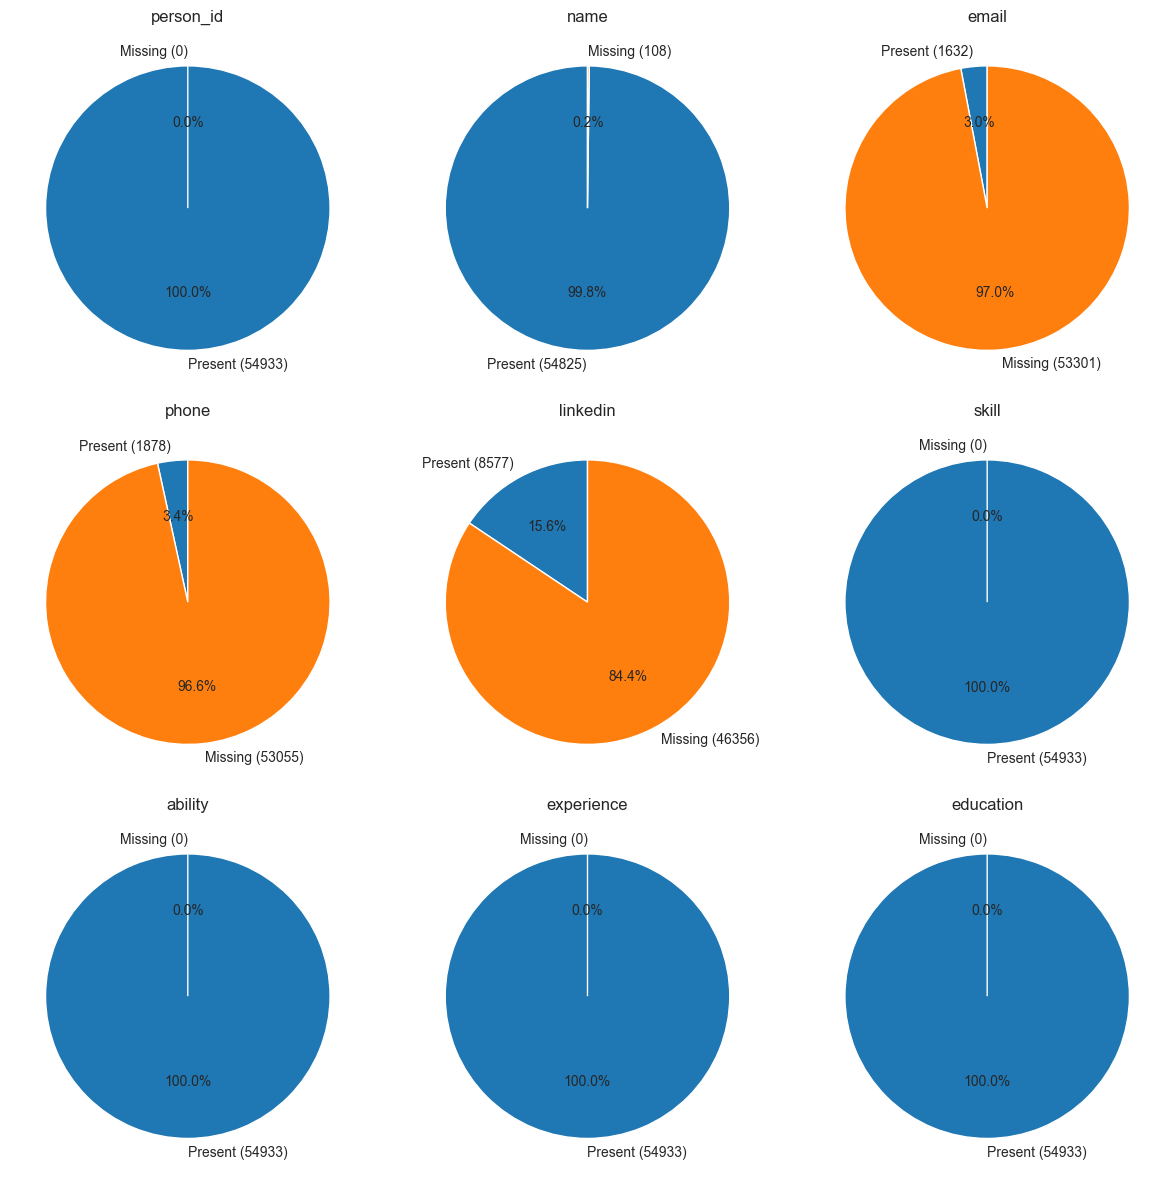

In [10]:
# %% cell: missing_values_pies_grid
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Use a vibrant color palette
palette = sns.color_palette("tab10", 10)  # 10 distinct colors

cols = full_df.columns
n_cols = 3  # number of columns in grid
n_rows = int(np.ceil(len(cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*4))

for i, col in enumerate(cols):
    row = i // n_cols
    col_idx = i % n_cols
    ax = axes[row, col_idx] if n_rows > 1 else axes[col_idx]
    
    missing_count = full_df[col].isna().sum()
    non_missing_count = len(full_df) - missing_count
    sizes = [non_missing_count, missing_count]
    labels = [f"Present ({non_missing_count})", f"Missing ({missing_count})"]
    
    ax.pie(sizes, labels=labels, autopct="%1.1f%%", colors=[palette[0], palette[1]], startangle=90, textprops={'fontsize':10})
    ax.set_title(col, fontsize=12)

# Hide any empty subplots
if n_rows*n_cols > len(cols):
    for j in range(len(cols), n_rows*n_cols):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


In [11]:
# 1️⃣ Print missing values summary
print("Missing Values Summary:\n")
missing_summary = pd.DataFrame({
    "column": full_df.columns,
    "missing_count": full_df.isna().sum(),
    "missing_percent": (full_df.isna().sum() / len(full_df) * 100).round(2)
})
print(missing_summary)

Missing Values Summary:

                column  missing_count  missing_percent
person_id    person_id              0             0.00
name              name            108             0.20
email            email          53301            97.03
phone            phone          53055            96.58
linkedin      linkedin          46356            84.39
skill            skill              0             0.00
ability        ability              0             0.00
experience  experience              0             0.00
education    education              0             0.00


In [13]:
%pip install faker


   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/2.0 MB 1.3 MB/s eta 0:00:02
   ---------------- ----------------------- 0.8/2.0 MB 1.4 MB/s eta 0:00:01
   --------------------- ------------------ 1.0/2.0 MB 1.4 MB/s eta 0:00:01
   -------------------------------- ------- 1.6/2.0 MB 1.6 MB/s eta 0:00:01
   ------------------------------------- -- 1.8/2.0 MB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
# %% cell: fill_missing_with_faker
from faker import Faker
import pandas as pd

fake = Faker()

# Copy your dataframe
df_filled = full_df.copy()

# Fill missing emails
df_filled['email'] = df_filled['email'].apply(
    lambda x: x if pd.notna(x) and x != '' else fake.email()
)

# Fill missing phone numbers
df_filled['phone'] = df_filled['phone'].apply(
    lambda x: x if pd.notna(x) and x != '' else fake.phone_number()
)

# Fill missing LinkedIn URLs
df_filled['linkedin'] = df_filled['linkedin'].apply(
    lambda x: x if pd.notna(x) and x != '' else f"https://www.linkedin.com/in/{fake.user_name()}/"
)

# Optional: save to CSV
df_filled.to_csv("C:/Users/ROYAUME MEDIAS/OneDrive/Desktop/DataGeneration/data/full_hr_dataset_filled.csv", index=False)

print("Missing values filled with fake data!")
df_filled[['email','phone','linkedin']].head(5)


Missing values filled with fake data!


,email,phone,linkedin
0,veverett@example.net,+1-781-860-7401x57252,https://www.linkedin.com/in/jennifer92/
1,jason22@example.com,+1-979-263-5899,https://www.linkedin.com/in/timothy17/
2,ilopez@example.org,9716152724,https://www.linkedin.com/in/jenkinsjerry/
3,kennethperez@example.com,663.959.7287x940,https://www.linkedin.com/in/wadechristopher/
4,tcolon@example.net,606-471-5357x29480,https://www.linkedin.com/in/justinjohnson/


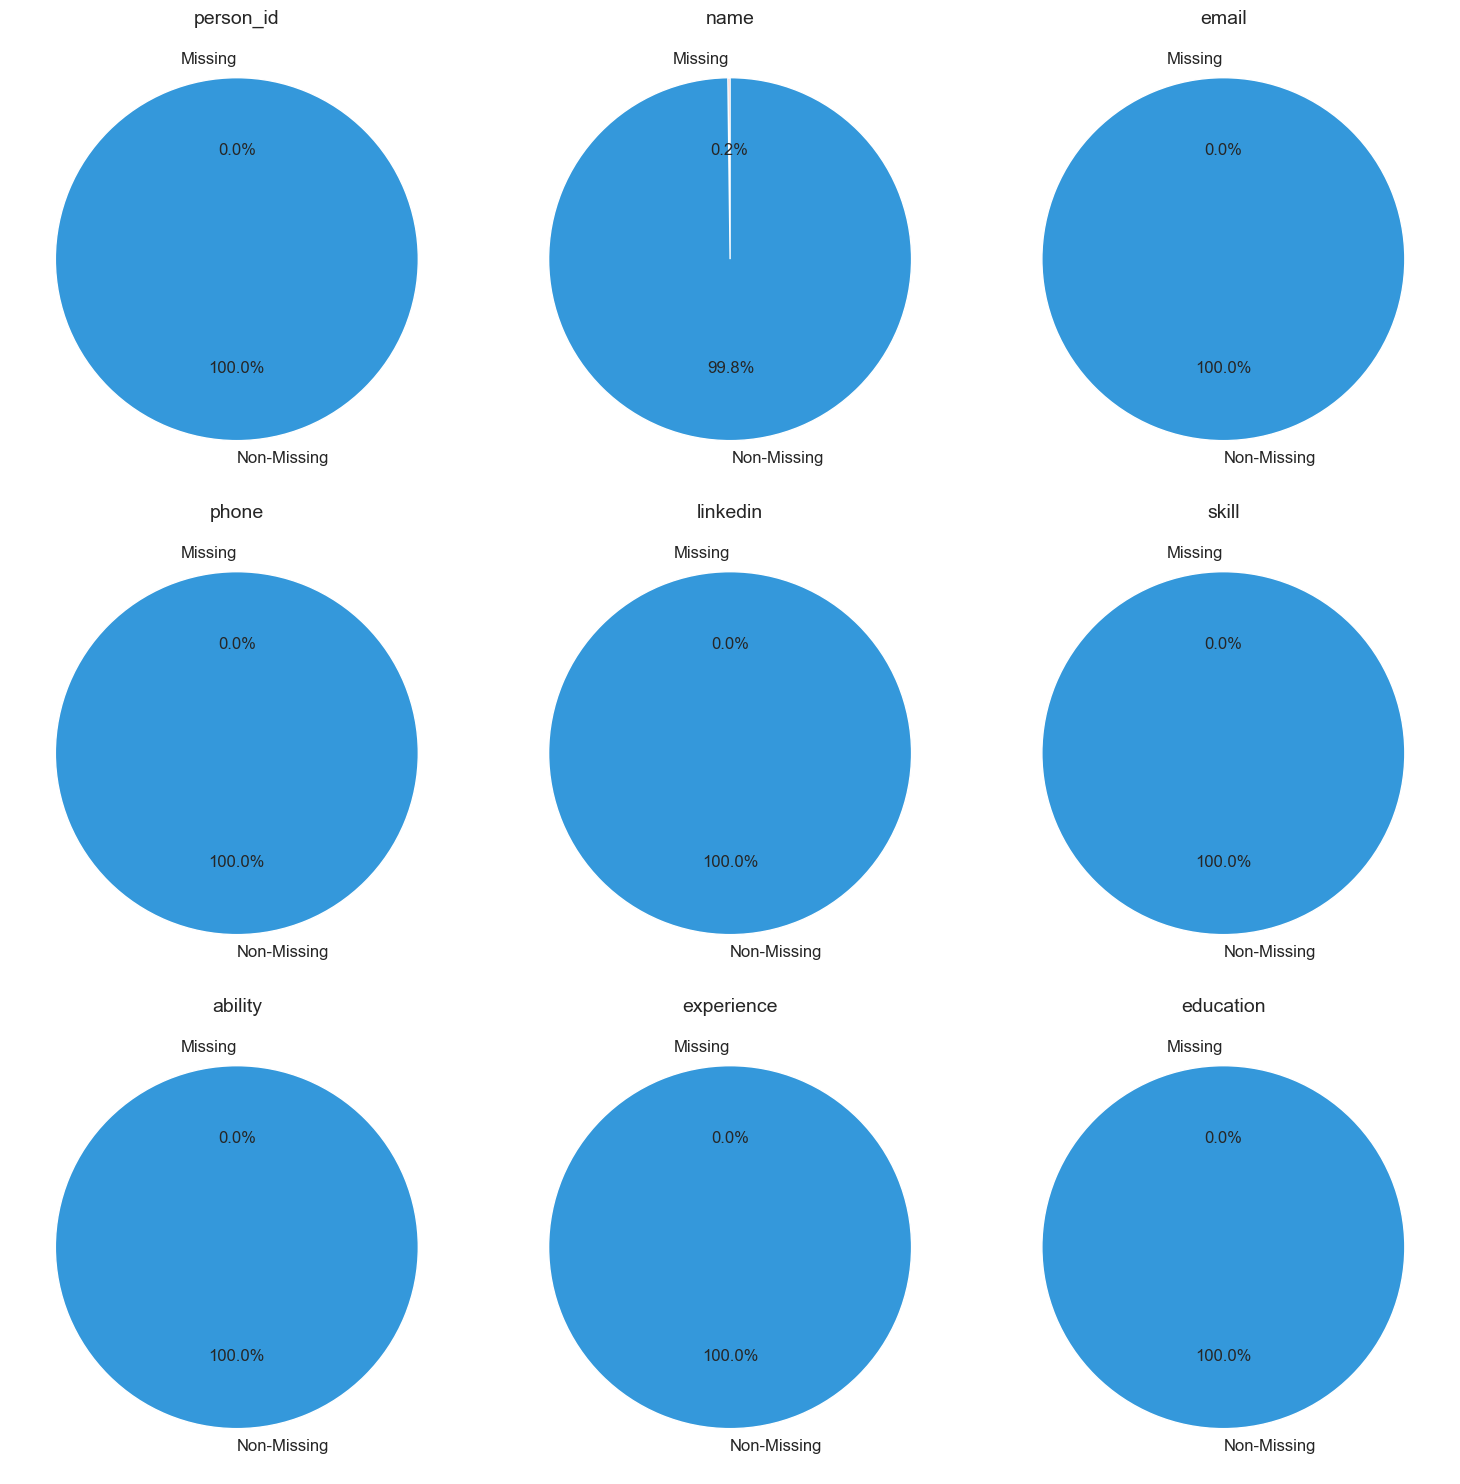

In [16]:
# %% cell: pie_missing_filled
import matplotlib.pyplot as plt

# Columns to plot
columns = df_filled.columns.tolist()

# Prepare subplot grid
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))

axes = axes.flatten()

for i, col in enumerate(columns):
    counts = [
        df_filled[col].isna().sum(),           # missing
        df_filled[col].notna().sum()           # non-missing
    ]
    labels = ['Missing', 'Non-Missing']
    colors = ['#e74c3c', '#3498db']  # red = missing, blue = non-missing

    axes[i].pie(counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
    axes[i].set_title(f"{col}", fontsize=14)

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [26]:
%pip install textblob


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
import pandas as pd
import re
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

# Télécharger les ressources NLTK nécessaires
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

# ---------------- Fonctions ----------------
def clean_text(text):
    """Nettoyage basique du texte"""
    text = re.sub(r'^RT[\s]+', '', str(text))           # Retirer 'RT' en début
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)   # Retirer URLs
    text = re.sub(r'#', '', text)                       # Retirer les hashtags
    return text

def lemmatize_text(text):
    """Lemmatisation simple des tokens"""
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    lemmatizer = WordNetLemmatizer()
    stopwords_eng = set(stopwords.words('english'))

    tokens = tokenizer.tokenize(text)
    tokens_no_stop = [t for t in tokens if t not in stopwords_eng]
    lemmatized_tokens = [lemmatizer.lemmatize(t) for t in tokens_no_stop]

    return ' '.join(lemmatized_tokens)  # Retourner sous forme de texte

def preprocess_column(col_series):
    """Appliquer cleaning + lemmatization sur une colonne pandas"""
    return col_series.apply(lambda x: lemmatize_text(clean_text(x)))

# ---------------- Charger le dataset ----------------
df = pd.read_csv("C:/Users/ROYAUME MEDIAS/OneDrive/Desktop/DataGeneration/data/full_hr_dataset_filled.csv")

# Créer une nouvelle DataFrame pour ne pas toucher à l'originale
df_cleaned = df.copy()

# Identifier les colonnes texte
text_columns = df_cleaned.select_dtypes(include='object').columns

# Appliquer le prétraitement uniquement sur le texte
for col in text_columns:
    df_cleaned[col] = preprocess_column(df_cleaned[col])

# Sauvegarder la nouvelle DataFrame
df_cleaned.to_csv("C:/Users/ROYAUME MEDIAS/OneDrive/Desktop/DataGeneration/data/full_hr_dataset_cleaned.csv", index=False)

print("Nettoyage et lemmatisation appliqués sur toutes les colonnes texte !")


[nltk_data] Downloading package wordnet to C:\Users\ROYAUME
[nltk_data]     MEDIAS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\ROYAUME
[nltk_data]     MEDIAS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\ROYAUME
[nltk_data]     MEDIAS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Nettoyage et lemmatisation appliqués sur toutes les colonnes texte !


In [36]:
print(df_cleaned.head(5))


   person_id                                               name  \
0          1                             database administrator   
1          2                             database administrator   
2          3                      oracle database administrator   
3          4  amazon redshift administrator etl developer , ...   
4          5             scrum master scrum master scrum master   

                      email                   phone linkedin  \
0      veverett@example.net  +1-781-860-7401 x57252            
1       jason22@example.com         +1-979-263-5899            
2        ilopez@example.org              9716152724            
3  kennethperez@example.com       663.959.7287 x940            
4        tcolon@example.net     606-471-5357 x29480            

                                               skill  \
0  [ ' database administration ' , ' database ' ,...   
1  [ ' sql server management studio ' , ' visual ...   
2  [ ' database ' , ' oracle ( 4 year ) ' , 

In [37]:
# Vérifier les valeurs manquantes
print("Valeurs manquantes par colonne :\n", df_cleaned.isna().sum())

Valeurs manquantes par colonne :
 person_id     0
name          0
email         0
phone         0
linkedin      0
skill         0
ability       0
experience    0
education     0
dtype: int64


II DATA JOB

In [14]:
df_job = pd.read_csv("C:/Users/ROYAUME MEDIAS/OneDrive/Desktop/DataGeneration/data/job_title_des.csv")
# Aperçu des premières lignes
print(df_job.head())

# Informations générales sur le dataset
print(df_job.info())

# Statistiques descriptives
print(df_job.describe(include='all'))

   Unnamed: 0             Job Title  \
0           0     Flutter Developer   
1           1      Django Developer   
2           2      Machine Learning   
3           3         iOS Developer   
4           4  Full Stack Developer   

                                     Job Description  
0  We are looking for hire experts flutter develo...  
1  PYTHON/DJANGO (Developer/Lead) - Job Code(PDJ ...  
2  Data Scientist (Contractor)\n\nBangalore, IN\n...  
3  JOB DESCRIPTION:\n\nStrong framework outside o...  
4  job responsibility full stack engineer – react...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       2277 non-null   int64 
 1   Job Title        2277 non-null   object
 2   Job Description  2277 non-null   object
dtypes: int64(1), object(2)
memory usage: 53.5+ KB
None
         Unnamed: 0             Job Title  \
cou

In [16]:
# Valeurs manquantes par colonne
missing = df_job.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing)

# Pourcentage de valeurs manquantes
missing_percent = (df_job.isnull().sum() / len(df)) * 100
print("Pourcentage de valeurs manquantes :\n", missing_percent)


Valeurs manquantes par colonne :
 Unnamed: 0         0
Job Title          0
Job Description    0
dtype: int64


NameError: name 'df' is not defined

In [17]:
%pip install missingno


Note: you may need to restart the kernel to use updated packages.


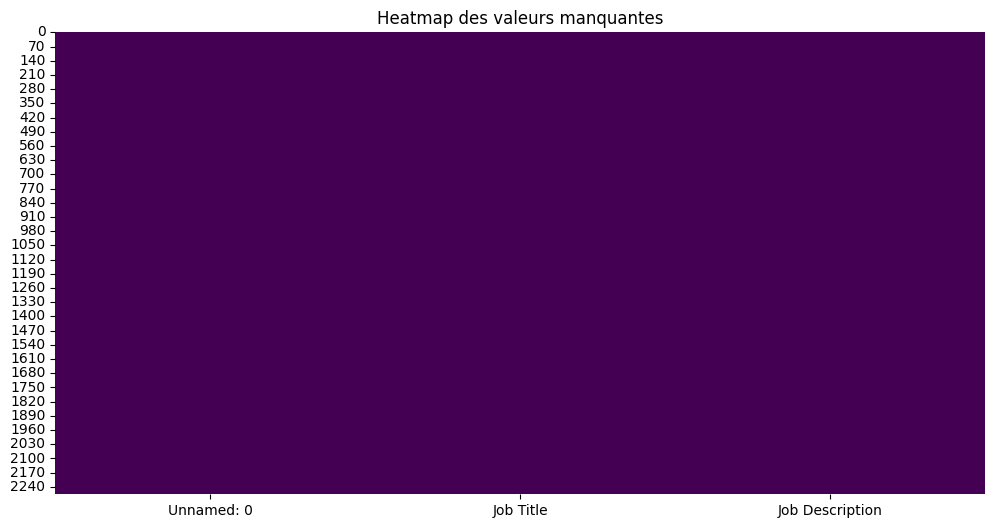

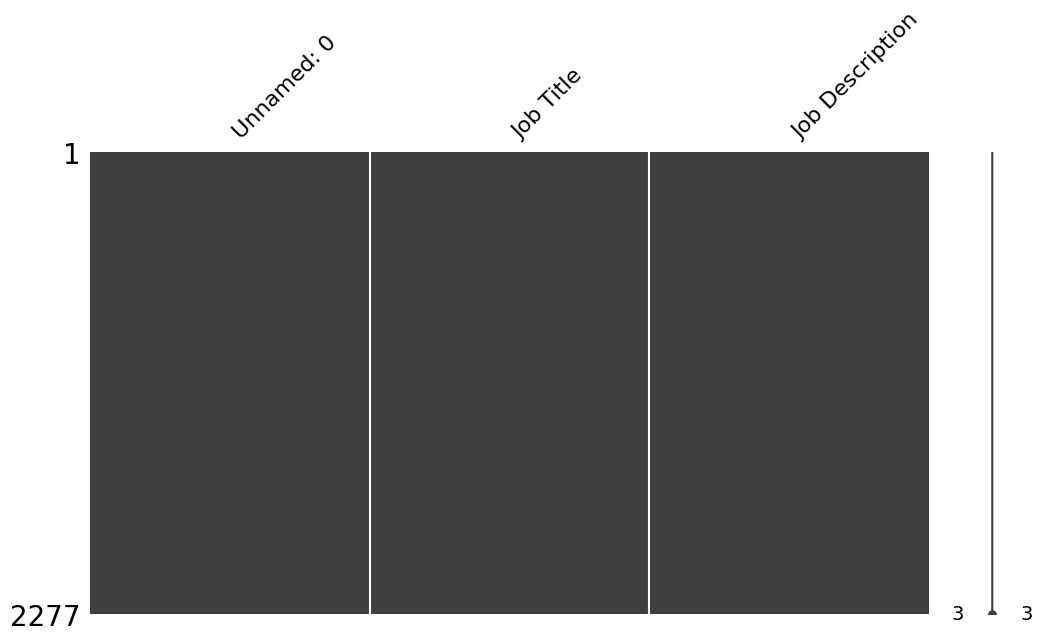

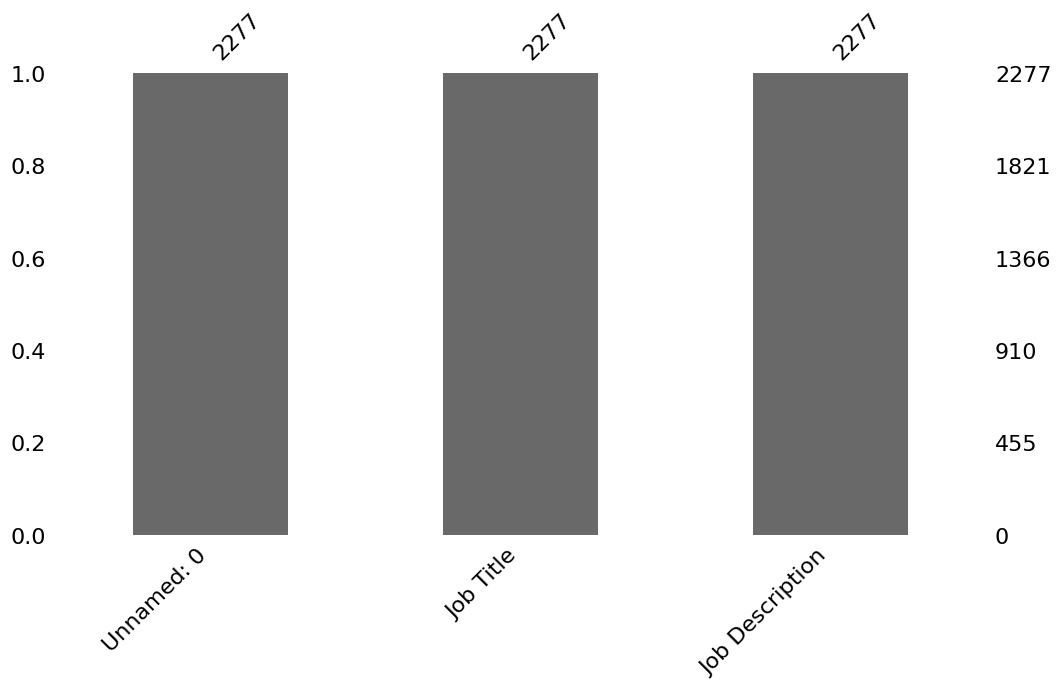

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Heatmap des valeurs manquantes
plt.figure(figsize=(12,6))
sns.heatmap(df_job.isna(), cbar=False, cmap="viridis")
plt.title("Heatmap des valeurs manquantes")
plt.show()

# Matrice avec missingno
msno.matrix(df_job, figsize=(12,6))
plt.show()

# Barplot des valeurs manquantes
msno.bar(df_job, figsize=(12,6))
plt.show()


Unnamed: 0: 2277 valeurs uniques
Job Title: 15 valeurs uniques
Job Description: 2264 valeurs uniques

Top 10 valeurs pour Job Title:
Job Title
JavaScript Developer    166
Java Developer          161
Software Engineer       160
Node js developer       160
iOS Developer           159
PHP Developer           156
Flutter Developer       155
DevOps Engineer         155
Django Developer        152
Machine Learning        152
Name: count, dtype: int64

Top 10 valeurs pour Job Description:
Job Description
Staff Engineer (Java Full Stack)\n6 to 9 years of experience\nABOUT NAGARRO:\nNagarro helps clients transform, adapt, and build new ways into the future through an entrepreneurial, agile, and caring mindset. We excel at digital product engineering and deliver on our promise of thinking breakthroughs. Today, we are 8,400+ experts across 25 countries, forming a Nation of Nagarrians, ready to help our customers succeed.\nAt Nagarro, you can look forward to a work culture that is dynamic and non-

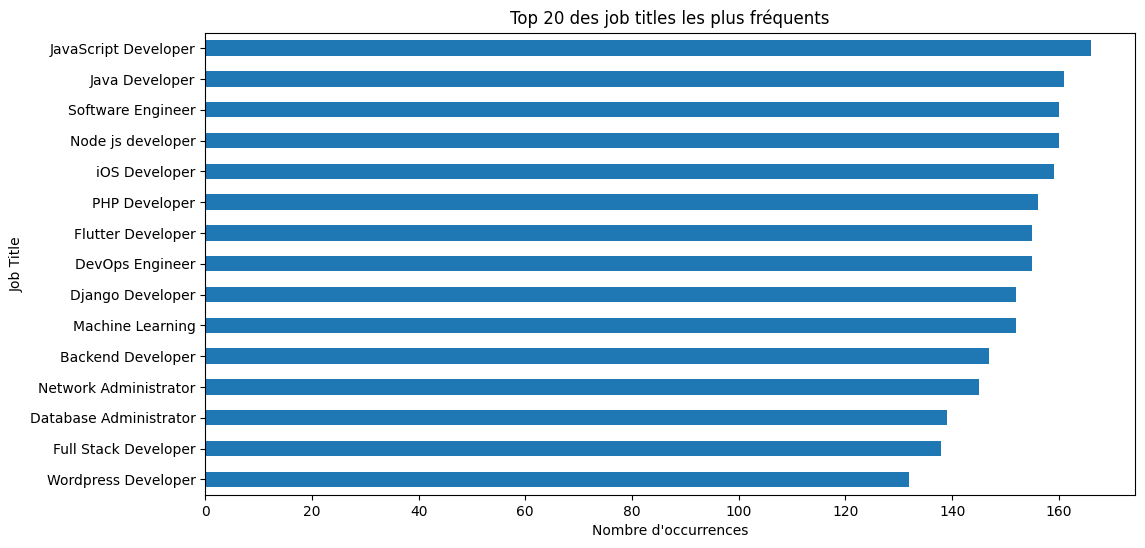

In [19]:
import matplotlib.pyplot as plt

# Nombre de valeurs uniques
for col in df_job.columns:
    print(f"{col}: {df_job[col].nunique()} valeurs uniques")

# Top 10 valeurs les plus fréquentes (utile pour features textuelles)
for col in df_job.select_dtypes(include='object').columns:
    print(f"\nTop 10 valeurs pour {col}:")
    print(df_job[col].value_counts().head(10))

# Visualisation des 20 Job Titles les plus fréquents
plt.figure(figsize=(12,6))
df_job['Job Title'].value_counts().head(20).plot(kind='barh')
plt.xlabel("Nombre d'occurrences")
plt.ylabel("Job Title")
plt.title("Top 20 des job titles les plus fréquents")
plt.gca().invert_yaxis()  # pour que le plus fréquent soit en haut
plt.show()


In [20]:
df_job.columns = df_job.columns.str.strip().str.lower().str.replace(' ', '_')
# Ensuite tu peux utiliser :
df_job['text'] = df_job['job_title'] + ' ' + df_job['job_description']


In [21]:
import pandas as pd
import ast

df_cv = pd.read_csv("C:/Users/ROYAUME MEDIAS/OneDrive/Desktop/DataGeneration/data/full_hr_dataset_cleaned.csv")

# Fonction sécurisée pour convertir les listes stockées sous forme de string
def safe_eval(x):
    if pd.isna(x):
        return []
    try:
        return ast.literal_eval(x)
    except:
        return []

# Création de la colonne 'text'
df_cv['text'] = df_cv['skill'].apply(lambda x: ' '.join(safe_eval(x))) + ' ' + df_cv['ability'].apply(lambda x: ' '.join(safe_eval(x)))

# Vérification
print(df_cv['text'].head())


0     database administration   database   m sql se...
1     sql server management studio   visual studio ...
2     database   oracle ( 4 year )   oracle 10g   s...
3     maintain multiple database environment ( reds...
4     scrum   agile software development   product ...
Name: text, dtype: object


In [22]:
# Pour df_cv
def safe_join(cell):
    try:
        items = eval(cell) if pd.notna(cell) else []
        return ' '.join(items)
    except:
        return ''

df_cv['text'] = df_cv['skill'].apply(safe_join) + ' ' + df_cv['ability'].apply(safe_join)

df_job['text'] = df_job['job_title'].fillna('') + ' ' + df_job['job_description'].fillna('')


In [23]:
%pip install transformers




Note: you may need to restart the kernel to use updated packages.


In [9]:
from transformers import AutoTokenizer, AutoModel
import torch

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModel.from_pretrained("distilbert-base-uncased")

def embed_text(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach()

cv_embeddings = torch.vstack([embed_text(t) for t in df_cv['text']])
job_embeddings = torch.vstack([embed_text(t) for t in df_job['text']])


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

c:\Users\ROYAUME MEDIAS\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ROYAUME MEDIAS\.cache\huggingface\hub\models--distilbert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

NameError: name 'df_cv' is not defined

CBOW

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# CBOW-like pour CV
vectorizer_cbow = TfidfVectorizer(max_features=5000)
cv_cbow_tfidf = vectorizer_cbow.fit_transform(df_cv['text'])

# CBOW-like pour Job
vectorizer_cbow_job = TfidfVectorizer(max_features=5000, vocabulary=vectorizer_cbow.vocabulary_)
job_cbow_tfidf = vectorizer_cbow_job.fit_transform(df_job['text'])

# Similarité cosine
similarity_cbow = cosine_similarity(cv_cbow_tfidf, job_cbow_tfidf)
print("CBOW similarity shape:", similarity_cbow.shape)
print("Average CBOW similarity:", np.mean(similarity_cbow))


CBOW similarity shape: (54933, 2277)
Average CBOW similarity: 0.04804992246245812


Skip-gram

In [25]:
# Skip-gram : sg=1
skip_model = Word2Vec(sentences=df_cv['tokens'], vector_size=100, window=5, min_count=1, sg=1)

def get_skip_vector(tokens):
    vectors = [skip_model.wv[word] for word in tokens if word in skip_model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(skip_model.vector_size)

# Embeddings
cv_skip_embeddings = np.vstack(df_cv['tokens'].apply(get_skip_vector))
job_skip_embeddings = np.vstack(df_job['tokens'].apply(get_skip_vector))

# Similarité Skip-gram
similarity_skip = cosine_similarity(cv_skip_embeddings, job_skip_embeddings)
print("Skip-gram similarity shape:", similarity_skip.shape)


NameError: name 'Word2Vec' is not defined

BERT

In [26]:
from transformers import AutoTokenizer, AutoModel
import torch

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModel.from_pretrained("distilbert-base-uncased")

def embed_text(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach()

# Embeddings
cv_bert_embeddings = torch.vstack([embed_text(t) for t in df_cv['text']])
job_bert_embeddings = torch.vstack([embed_text(t) for t in df_job['text']])

# Similarité BERT
similarity_bert = cosine_similarity(cv_bert_embeddings, job_bert_embeddings)
print("BERT similarity shape:", similarity_bert.shape)


KeyboardInterrupt: 